In [1]:
## "basic_pqd_cnn.ipynb" follows the CNN structure used by the paper.
## Dataset used is pqd_dataset_05.

In [2]:
# Import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, utils, activations
from tensorflow.keras import optimizers, losses, metrics, preprocessing
from google.colab import drive

In [3]:
# Connect to the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import the training dataset
training_dataset = utils.image_dataset_from_directory(
    directory='/content/drive/My Drive/pqd_dataset_05/training_set',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 4200 files belonging to 10 classes.


In [5]:
# Import the validation dataset
validation_dataset = utils.image_dataset_from_directory(
    directory='/content/drive/My Drive/pqd_dataset_05/validation_set',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 1400 files belonging to 10 classes.


In [6]:
# Import the testing dataset
testing_dataset = utils.image_dataset_from_directory(
    directory='/content/drive/My Drive/pqd_dataset_05/testing_set',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 1400 files belonging to 10 classes.


In [7]:
# Build the CNN model
cnn = models.Sequential()
# Add first convolution layer
cnn.add(layers.Conv2D(
    filters=32, 
    kernel_size=(5, 5), 
    padding='valid', 
    activation='relu', 
    input_shape=(200, 200, 1)
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add second convolution layer
cnn.add(layers.Conv2D(
    filters=48, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add final convolution layer
cnn.add(layers.Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
# Add fully-connected layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(
    units=10,
    activation='softmax'
    )
)

In [8]:
# Show the structure of the CNN
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 average_pooling2d (AverageP  (None, 98, 98, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 48)        13872     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 48)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        27712     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [9]:
# Configure the CNN for training
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Train the CNN for 10 epochs with the training dataset
# Validate the CNN with the validation dataset
history = cnn.fit(
    training_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
132/132 [==============================] - 918s 7s/step - loss: 18.0121 - accuracy: 0.7960 - val_loss: 0.1563 - val_accuracy: 0.9650
Epoch 2/10
132/132 [==============================] - 13s 92ms/step - loss: 0.1137 - accuracy: 0.9638 - val_loss: 0.1680 - val_accuracy: 0.9371
Epoch 3/10
132/132 [==============================] - 11s 84ms/step - loss: 0.0807 - accuracy: 0.9738 - val_loss: 0.0908 - val_accuracy: 0.9671
Epoch 4/10
132/132 [==============================] - 11s 84ms/step - loss: 0.0687 - accuracy: 0.9757 - val_loss: 0.2266 - val_accuracy: 0.9600
Epoch 5/10
132/132 [==============================] - 12s 86ms/step - loss: 0.1763 - accuracy: 0.9462 - val_loss: 0.1297 - val_accuracy: 0.9600
Epoch 6/10
132/132 [==============================] - 11s 84ms/step - loss: 0.0830 - accuracy: 0.9738 - val_loss: 0.0995 - val_accuracy: 0.9743
Epoch 7/10
132/132 [==============================] - 12s 85ms/step - loss: 0.0596 - accuracy: 0.9800 - val_loss: 0.0824 - val_accuracy:

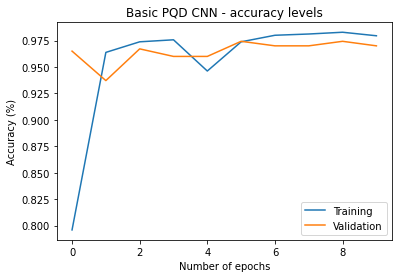

In [11]:
# Plot the training and validation accuracy of the CNN
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Basic PQD CNN - accuracy levels')
plt.ylabel('Accuracy (%)')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

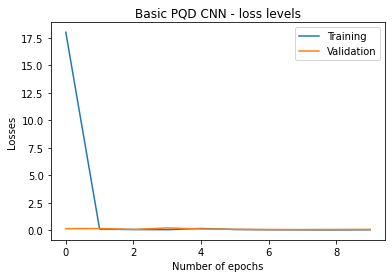

In [12]:
# Plot the training and validation loss levels of the CNN
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Basic PQD CNN - loss levels')
plt.ylabel('Losses')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [13]:
# Evaluate the CNN with the testing dataset
results = cnn.evaluate(
    testing_dataset
)

44/44 [==============================] - 243s 4s/step - loss: 0.1119 - accuracy: 0.9607


In [14]:
# Save the trained model
cnn.save('/content/drive/My Drive/saved_models/basic_pqd_cnn.h5')